In [9]:
import pandas
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

# Initial sample

In [3]:
data = pandas.read_csv('D:/BG/Data/2022/1/SKILL.txt',sep='\t',dtype={'JobId':str})
data = data.sort_values(['JobDate','BGTJobId'], ascending=[True, True])
print('{} postings'.format(data.shape[0]))
print(data.dtypes)

9229007 postings
BGTJobId                int64
JobId                  object
JobDate                object
CleanTitle             object
CanonTitle             object
OccFam                float64
OccFamName             object
SOC                    object
SOCName                object
ONET                   object
ONETName               object
Specialty              object
BGTOcc                 object
BGTOccName             object
BGTOccGroupName        object
BGTOccGroupName2       object
BGTCareerAreaName      object
BGTCareerAreaName2     object
Employer               object
Sector                 object
SectorName             object
NAICS3                float64
NAICS4                float64
NAICS5                float64
NAICS6                float64
City                   object
State                  object
County                 object
FIPSState             float64
FIPSCounty            float64
FIPS                  float64
Lat                   float64
Lon                   f

In [5]:
pandas.to_datetime(data.JobDate).dt.year.unique()

array([2017, 2018, 2019, 2020, 2021], dtype=int64)

 # Trend

In [6]:
df = data.copy()
df['Quarter'] = pandas.to_datetime(df.JobDate).dt.quarter+4*(pandas.to_datetime(df.JobDate).dt.year-2017)
mydf = df.Quarter.value_counts().sort_index().to_frame().reset_index()
#df = df.groupby(['Quarter']).nunique()[['BGTJobId']]
#df = df.droplevel(0, axis=1) 
print(mydf)

    index  Quarter
0       1   368289
1       2   358451
2       3   368396
3       4   303888
4       5   401518
5       6   433195
6       7   506646
7       8   527478
8       9   475626
9      10   454275
10     11   447632
11     12   481335
12     13   512966
13     14   341849
14     15   433021
15     16   420905
16     17   546399
17     18   618760
18     19   601051
19     20   627327


In [7]:
mydf.columns= ['Quarter','postings']
# Index of quarterly postings
mydf.postings= mydf.postings * 100/368289
mydf

,Quarter,postings
0,1,100.000000
1,2,97.328728
2,3,100.029053
3,4,82.513461
4,5,109.022534
5,6,117.623660
6,7,137.567508
7,8,143.223936
8,9,129.144775
9,10,123.347426


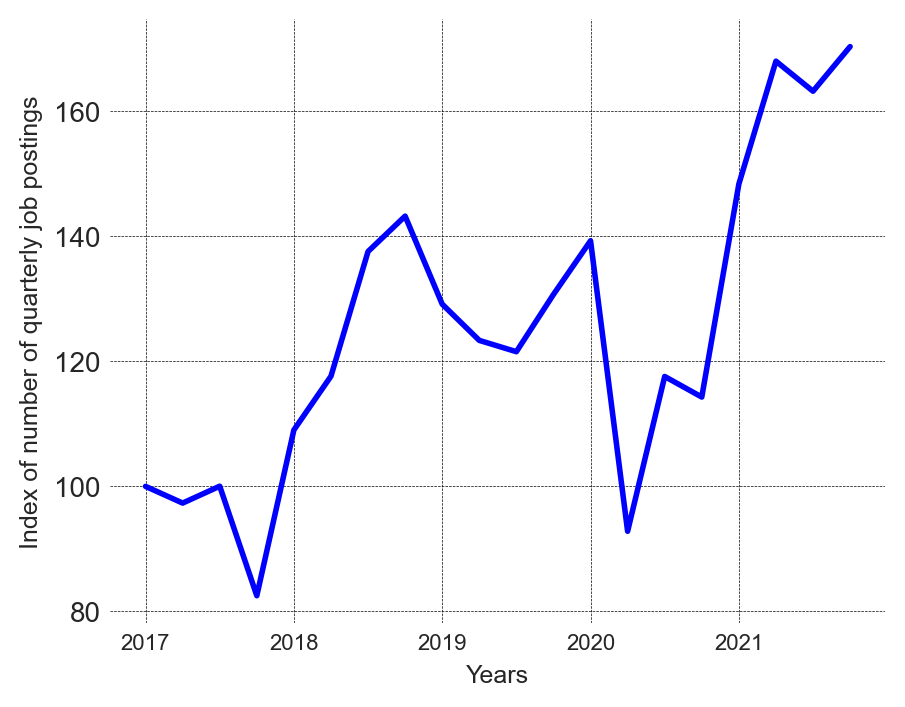

In [12]:
fig, ax = plt.subplots(figsize=(5,4),dpi=200)
ax.plot(mydf.Quarter[0:20],mydf.postings[0:20], color='blue', label = 'AM', linewidth=2)
ax.set_xticks([1,5,9,13,17])
ax.set_xticklabels(['2017','2018','2019','2020','2021'],size=8)
ax.grid(color='black',linestyle='--',linewidth=0.25)
ax.set_ylabel('Index of number of quarterly job postings',fontsize=9)
ax.set_xlabel('Years',fontsize=9)
plt.box(False)
plt.show()
fig.savefig('AMTM-Trend.jpg')